<h1>Introduction to regression</h1>
In this notebook we will have an overview of regression and how scikit-learn can be used to regress data.

In [4]:
# Importing the holy trinity of data science.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# getting seaborn online to give our graphics a kick.
import seaborn as sns
sns.set()

First, let us work towards building an intuition of the problem at hand by considering the dataset ds1 below,

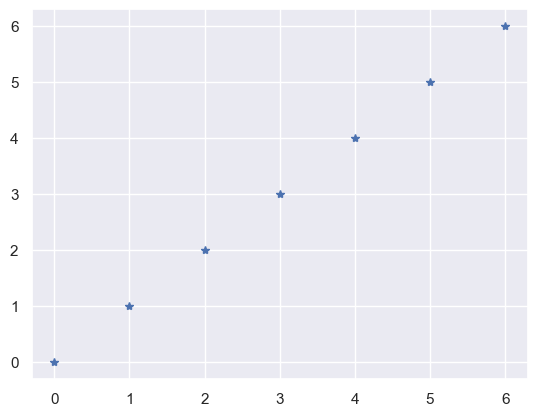

In [6]:
ds1 = [0,1,2,3,4,5,6]
plt.plot(ds1, marker='*',linestyle='')

Assuming that the red dot in the plot is a continuation of the dataset ds1 how can you workout the continuation of the this sequence?

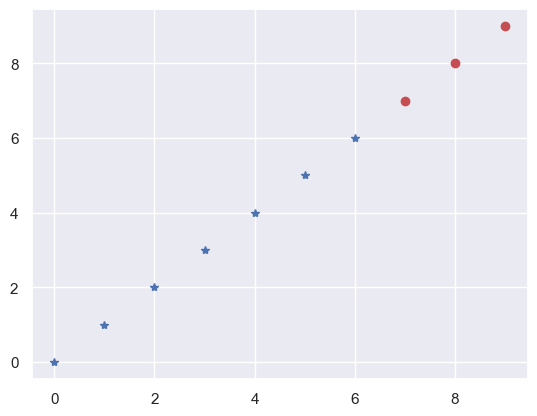

In [10]:
plt.plot(ds1, marker='*',linestyle='')
plt.scatter(np.arange(7,10),np.arange(7, 10),c='r')

Linear equations take the shape:

$$ Y = aX+b$$

From this, all we need is two points to workout the coefficient $$a$$ and knowing the value of $$Y(X=0)$$ to obtain B.

Question, would this logic work for the dataset plotted below?

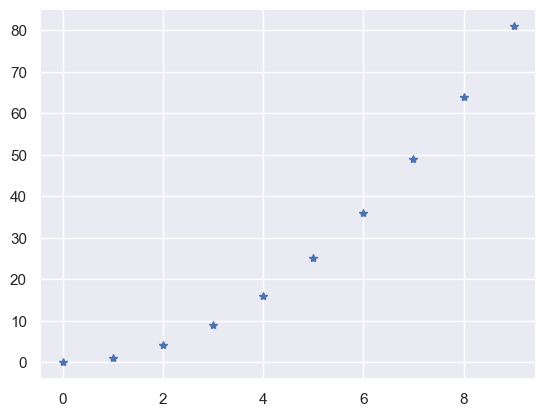

In [15]:
ds2 = [x**2 for x in range(10)]
plt.plot(ds2, marker='*',linestyle='')

In [16]:
del ds1,ds2

Now let us import our dataset.

In [20]:
df = pd.read_csv('Datasets/ds_salaries.csv',sep=',',index_col=0)

In [22]:
df.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [24]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Exercises:

- what would you consider an average, low and high salary for data scientist worldwide and in GB?

- Can you make a graphic containing the distribution of these salaries?

- Compare the salaries of DSs that work at the office, hybrid or remote.

In [27]:
df.salary_in_usd.describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [29]:
df[df.company_location == 'GB'].salary_in_usd.describe()
    


count        47.000000
mean      81583.042553
std       29524.011146
min       37300.000000
25%       57575.000000
50%       78526.000000
75%      103931.000000
max      183228.000000
Name: salary_in_usd, dtype: float64

<Axes: >

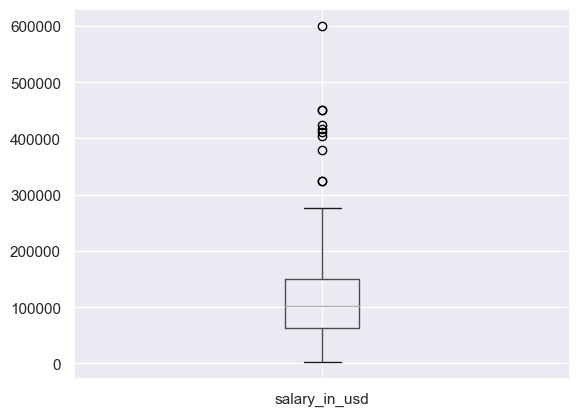

In [31]:
df.boxplot(column='salary_in_usd')

<Axes: >

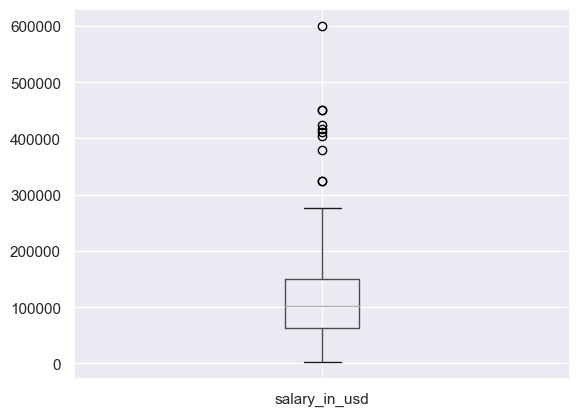

In [33]:
df.boxplot(column='salary_in_usd')

In [35]:
df.salary_in_usd.describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [37]:
df.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [39]:
len(df)

607

In [41]:
df.company_location.value_counts()

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

In [43]:
df[df.company_location == 'US'].salary_in_usd.describe()

count       355.000000
mean     144055.261972
std       69906.895041
min        5679.000000
25%      100000.000000
50%      135000.000000
75%      170000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [45]:
df[df.company_location == 'GB'].salary_in_usd.describe()

count        47.000000
mean      81583.042553
std       29524.011146
min       37300.000000
25%       57575.000000
50%       78526.000000
75%      103931.000000
max      183228.000000
Name: salary_in_usd, dtype: float64

In [47]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [49]:
df[df.company_location != df.employee_residence]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
17,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S
19,2020,MI,FT,Lead Data Engineer,56000,USD,56000,PT,100,US,M
32,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
40,2020,MI,FT,Data Scientist,45760,USD,45760,PH,100,US,S
53,2020,EN,FT,Data Engineer,48000,EUR,54742,PK,100,DE,L
54,2020,SE,FL,Computer Vision Engineer,60000,USD,60000,RU,100,US,S
61,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
70,2020,MI,FT,Data Scientist,55000,EUR,62726,FR,50,LU,S
73,2021,EX,FT,BI Data Analyst,150000,USD,150000,IN,100,US,L
82,2021,MI,FT,Applied Data Scientist,68000,CAD,54238,GB,50,CA,L


In [51]:
len(df)

607

<Axes: >

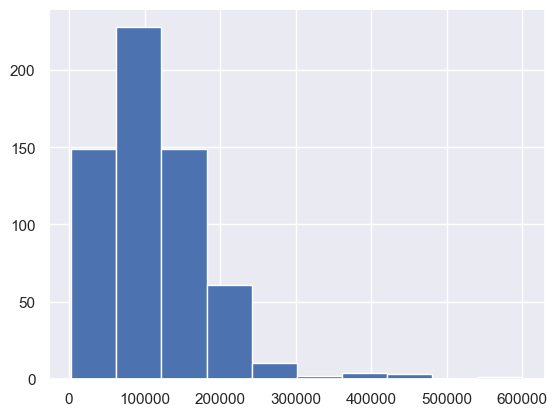

In [53]:
df.salary_in_usd.hist()

<Axes: >

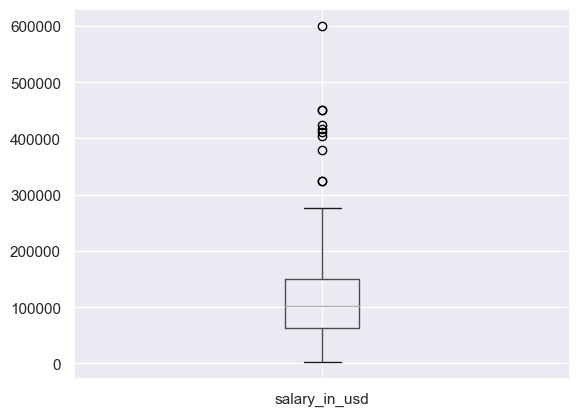

In [92]:
df.boxplot(column='salary_in_usd')

In [57]:
df.company_location.value_counts()

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

In [59]:
len(df[df.company_location != df.employee_residence])

51

In [61]:
df[df['remote_ratio'] >50 ].salary_in_usd.describe()

count       381.000000
mean     122457.454068
std       72710.843718
min        4000.000000
25%       75774.000000
50%      115000.000000
75%      160000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [63]:
df[df['remote_ratio'] <=50 ].salary_in_usd.describe()

count       226.000000
mean      95170.429204
std       64516.566450
min        2859.000000
25%       54130.000000
50%       82636.000000
75%      121759.500000
max      450000.000000
Name: salary_in_usd, dtype: float64

<h1>Data prep</h1>
Now we will prepare the data to be fed into the machine learning models.

Exercise: are there any columns that should be excluded?

In [66]:
df.work_year.value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

In [68]:
df.employment_type.value_counts()

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64

In [70]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [72]:
df = df.drop(['salary','salary_currency'],axis=1)

Exercise: is there any missing data that needs to be dealt with? (if so, do it!)

In [78]:
print('no.')

no.


In [80]:
df.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

Exercise: find what columns should be encoded and encode them.

In [86]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [87]:
# Hint, use:
from sklearn.preprocessing import LabelEncoder

In [88]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [61]:
df.key()

AttributeError: 'DataFrame' object has no attribute 'key'

In [49]:
le = LabelEncoder()

In [53]:
le.fit_transform(df.experience_level)

array([2, 3, 3, 2, 3, 0, 3, 2, 2, 3, 0, 2, 0, 2, 2, 2, 0, 3, 0, 2, 2, 2,
       3, 2, 2, 1, 0, 3, 0, 3, 2, 0, 3, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2,
       2, 0, 2, 3, 2, 2, 0, 0, 0, 0, 3, 3, 2, 2, 3, 2, 2, 2, 0, 3, 3, 0,
       0, 3, 0, 3, 2, 2, 0, 1, 1, 3, 2, 2, 2, 0, 3, 2, 2, 2, 1, 2, 0, 2,
       3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 0,
       3, 3, 3, 0, 2, 0, 2, 2, 0, 2, 2, 3, 0, 0, 0, 2, 3, 2, 0, 3, 0, 0,
       2, 3, 0, 2, 2, 2, 3, 0, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 0,
       3, 3, 2, 2, 3, 0, 1, 1, 2, 0, 1, 3, 0, 1, 0, 2, 2, 2, 0, 3, 3, 3,
       2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 3, 0, 2, 3, 3, 2, 0, 3,
       3, 0, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 0, 0, 3, 0, 2, 2, 3,
       2, 2, 2, 2, 3, 1, 3, 2, 3, 3, 0, 3, 3, 3, 2, 2, 2, 2, 0, 0, 3, 2,
       2, 3, 0, 2, 0, 2, 3, 3, 2, 0, 1, 0, 2, 3, 2, 3, 3, 1, 2, 3, 2, 3,
       2, 3, 2, 2, 2, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 2, 0, 2, 3, 2, 3,
       3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3,

In [55]:
le.fit_transform(df.job_title)

array([22, 41,  7, 47, 38, 12, 34, 22,  8, 33, 22, 22, 22, 32, 12, 12, 17,
        7, 19, 33, 38, 47, 17,  5, 34, 25, 48, 17,  8, 40, 18,  7, 22, 48,
       12, 17, 19, 38, 12, 38, 22, 18, 39, 17, 17, 36, 22, 17, 22, 17, 12,
       12,  1, 17, 10, 46, 22, 22, 22, 22, 17, 17, 22, 22, 38, 22, 22, 21,
       22, 22, 22, 22, 48,  5, 29, 22,  5,  0, 36, 12, 13, 17,  3, 38, 25,
       17, 12, 13, 32, 12, 42, 19, 32, 33, 22,  9,  1, 28, 11, 11, 12, 17,
        5, 12, 22, 12, 48, 17, 17, 17, 38, 24, 33,  1, 17, 41, 22, 20, 12,
       17,  7, 45, 12,  3, 12, 46, 41, 22, 38, 34, 37, 22,  4, 10, 22, 12,
       36, 36, 46, 22, 12, 21, 18, 22, 17, 38, 48, 17, 18,  9, 25, 22, 22,
       22, 21, 20, 22,  4, 15, 38, 29, 30, 17, 19, 25, 23, 17, 25,  5, 16,
       16, 17, 12, 46, 48, 18, 22, 22, 38, 22,  7, 22, 17, 27, 41, 17, 13,
       19, 17, 38, 21, 38,  7, 21, 48, 22,  5, 38, 21, 19, 22, 39, 22, 48,
       22, 22, 38, 17, 17, 15, 38, 48, 17,  7, 38, 45, 10, 22, 38, 15, 38,
       22, 22, 22, 41, 46

In [47]:
for x in df.keys():
    print(f'the value of x is: {x}')

the value of x is: work_year
the value of x is: experience_level
the value of x is: employment_type
the value of x is: job_title
the value of x is: salary
the value of x is: salary_currency
the value of x is: salary_in_usd
the value of x is: employee_residence
the value of x is: remote_ratio
the value of x is: company_location
the value of x is: company_size


In [ ]:
df.head()

In [ ]:
for x in df.keys():
    if x in ['salary_in_usd', 'remote_ratio', 'work_year']:
        print("SKIIIIIP")
    else:
        df[f'{x}_enc'] = le.fit_transform(df[x])

In [ ]:
for x in df.keys():
    if x == 'salary_in_usd':
        print("SKIIIIIP")
    else:
        df[f'{x}_enc'] = le.fit_transform(df[x])

In [ ]:
df.head()

Exercise: find which columns should be scaled and do it.

In [ ]:
# Hint, use:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Preparing to scale.
salary = df['salary_in_usd'].to_numpy()

# Reshaping.
salary = salary.reshape(-1,1)

# Creating a new column with the scaled bit
df['salary_in_usd_sc'] = MinMaxScaler().fit_transform(salary)

In [ ]:
df.head()

In [ ]:
df[['salary_in_usd_sc','salary_in_usd']]

Exercise: split the dataset into a training and test set.

In [ ]:
# hint.
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, random_state=42)

In [ ]:
df.keys()

In [ ]:
X_train = train[['experience_level_enc', 'employment_type_enc', 'job_title_enc',
       'employee_residence_enc', 'company_location_enc',
       'company_size_enc']]
X_test = test[['experience_level_enc', 'employment_type_enc', 'job_title_enc',
       'employee_residence_enc', 'company_location_enc',
       'company_size_enc']]
y_train = train['salary_in_usd_sc']
y_test = test['salary_in_usd_sc']

In [ ]:
type(X_train)

<h1>Decision Tree Regressor</h1>
Now we will use the decision tree regressor 

[(Documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 

to try to estimate the values.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Notice how similar it is with the classification trees.
DTR = DecisionTreeRegressor(max_depth=900,random_state=42)

DTR.fit(X_train,y_train)

y_pred = DTR.predict(X_test)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(14,6))

ax.scatter(y_test,y_pred, s=10, label='Test')

ax.set_title(f'Data scientist salary prediction')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

Exercise: calculate MAE and MSE.

In [ ]:
# Hint.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
ys_mae = mean_absolute_error(y_test,y_pred)
ys_mse = mean_squared_error(y_test,y_pred)

In [ ]:
ys_mae

In [ ]:
ys_mae = mean_absolute_error(y_test,y_pred)
ys_mse = mean_squared_error(y_test,y_pred)

fig, ax = plt.subplots(1,1,figsize=(14,6))

ax.scatter(y_test,y_pred, s=10, label='Test')

ax.set_title(f'Data scientist salary prediction \n MAE:{ys_mae:.3f}, MSE:{ys_mse:.3f}')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

It is often useful to have an x=y line in to compare the results.

In [ ]:
ys_mae = mean_absolute_error(y_test,y_pred)
ys_mse = mean_squared_error(y_test,y_pred)

fig, ax = plt.subplots(1,1,figsize=(14,6))

ax.scatter(y_test,y_pred, s=10, label='Test')

ax.set_title(f'Data scientist salary prediction \n MAE:{ys_mae:.2f}, MSE:{ys_mse:.2f}')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

<h1>Random Forest Regressor</h1>

Check the [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Exercise: make a regression using the random forest regressor and plot your results.

In [ ]:
RFR = RandomForestRegressor(n_estimators=1,max_depth=1, random_state=42)

RFR.fit(X_train,y_train)

y_pred = RFR.predict(X_test)

In [ ]:
ys_mae = mean_absolute_error(y_test,y_pred)
ys_mse = mean_squared_error(y_test,y_pred)

fig, ax = plt.subplots(1,1,figsize=(14,6))

ax.scatter(y_test,y_pred, s=10, label='Test')

ax.set_title(f'Data scientist salary prediction \n MAE:{ys_mae:.2f}, MSE:{ys_mse:.2f}')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

Exercise: try increasing the depth and observe how it changes

<h1>Support Vector Machines</h1>

Link to the [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [ ]:
from sklearn.svm import SVR

Exercise: you know the drill.

In [ ]:
rgr = SVR()

rgr.fit(X_train,y_train)

y_pred = rgr.predict(X_test)

In [ ]:
ys_mae = mean_absolute_error(y_test,y_pred)
ys_mse = mean_squared_error(y_test,y_pred)

fig, ax = plt.subplots(1,1,figsize=(14,6))

ax.scatter(y_test,y_pred, s=10, label='Test')

ax.set_title(f'Data scientist salary prediction \n MAE:{ys_mae:.2f}, MSE:{ys_mse:.2f}')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

<h1>Pipelining</h1>

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
 # We don't need to put the scaler there because we already took care of it.
regr = make_pipeline(SVR(C=1.0, epsilon=0.2))

In [ ]:
regr.fit(X_train,y_train)

In [ ]:
# Checking which parameters can be tunned.
regr.get_params()

In [ ]:
parameteres = {'svr__C':[0.001,0.1,10,100,10e5], 'svr__gamma':[0.1,0.01]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# defining the gridsearch.
grid = GridSearchCV(regr, 
                    param_grid=parameteres, 
                    cv=5)

In [ ]:
grid.fit(X_train, y_train)
print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

Final Exercise: improve the model accuracy. Feel free to use any methods and tools you see fit.